# K Nearest Neighbors

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.
<br>
More information about this ML algorithm could be found from [Link](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)<br>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset as a dataframe
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.shape

(1000, 11)

## Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
# Importing the library to standardize the variables
from sklearn.preprocessing import StandardScaler

In [6]:
# Initializing the standard scaler class
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [8]:
# Transforming the variables and standardizing them
stand_scaler = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [9]:
# Forming a new DataFrame of the scaled features
df_new = pd.DataFrame(stand_scaler, columns=df.columns[:-1])
df_new.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test split

In [10]:
# Preparing train and test dataset for giving them as an input to train ML model
from sklearn.model_selection import train_test_split

In [11]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df_new, df['TARGET CLASS'], test_size = 0.3, random_state=101)

### Training model

In [12]:
# Importing K nearest neighbors from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Initializing the KNN algo with Nearest neighbors value as 1
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Predictions

In [15]:
# Performing predictions
predictions = knn.predict(X_test)

In [16]:
# Importing evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [18]:
confusion_matrix(y_test, predictions)

array([[151,   8],
       [ 15, 126]], dtype=int64)

### Now we have run our KNN ML model with 1 nearest neighbors on our dataset
#### We will try running the ML model and compare the error rates of different k nearest neighborers

In [19]:
# We will run a loop to calculate different error that were calculated for different k nearest neighbourers
error_rates = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

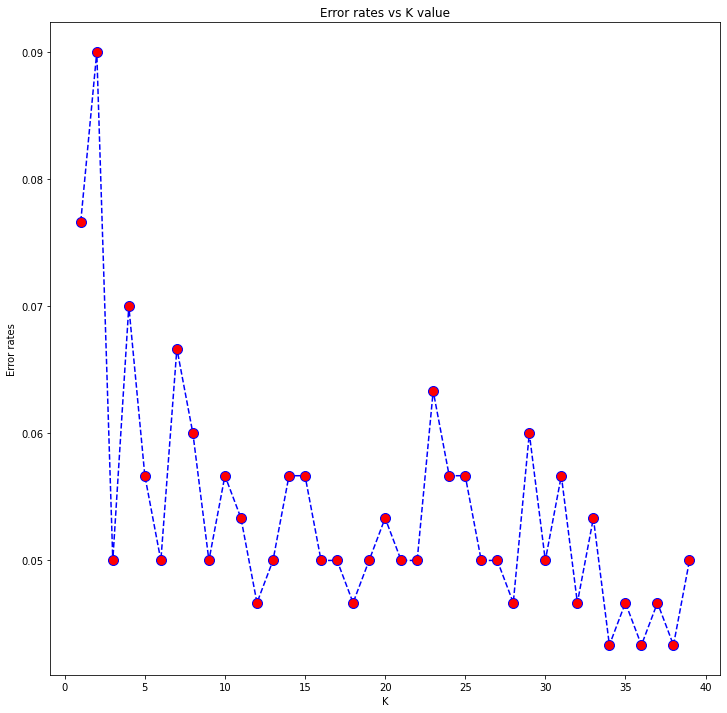

In [20]:
# Plotting the error rates
plt.figure(figsize=(12,12))
plt.plot(range(1,40), error_rates, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error rates vs K value')
plt.xlabel('K')
plt.ylabel('Error rates')
plt.show()

In [21]:
# We would choose k value of 17 based on analysis of above plot
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)

In [22]:
print(classification_report(y_test, pred_i))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [23]:
confusion_matrix(y_test, pred_i)

array([[153,   6],
       [  9, 132]], dtype=int64)